## **Util**

In [25]:
import matplotlib.pyplot as plt
import numpy as np


class util(object):
    @staticmethod
    def add_intercept(x):
        """Add intercept to matrix x.

        Args:
            x: 2D NumPy array.

        Returns:
            New matrix same as x with 1's in the 0th column.
        """
        new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
        new_x[:, 0] = 1
        new_x[:, 1:] = x
        return new_x

    @staticmethod
    def load_dataset(csv_path, label_col='y', add_intercept=False):
        """Load dataset from a CSV file.

        Args:
            csv_path: Path to CSV file containing dataset.
            label_col: Name of column to use as labels (should be 'y' or 't').
            add_intercept: Add an intercept entry to x-values.

        Returns:
            xs: Numpy array of x-values (inputs).
            ys: Numpy array of y-values (labels).
        """
        # Validate label_col argument
        allowed_label_cols = ('y', 't')
        if label_col not in allowed_label_cols:
            raise ValueError(
                f'Invalid label_col: {label_col} (expected one of {allowed_label_cols})'
            )

        # Load headers
        with open(csv_path, 'r') as csv_fh:
            headers = csv_fh.readline().strip().split(',')

        # Load features and labels
        x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
        l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
        inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols)
        labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols)

        if inputs.ndim == 1:
            inputs = np.expand_dims(inputs, -1)

        if add_intercept:
            inputs = util.add_intercept(inputs)

        return inputs, labels

    @staticmethod
    def plot(x, y, theta, save_path=None, correction=1.0):
        """Plot dataset and fitted logistic regression parameters.

        Args:
            x: Matrix of training examples, one per row.
            y: Vector of labels in {0, 1}.
            theta: Vector of parameters for logistic regression model.
            save_path: Path to save the plot.
            correction: Correction factor to apply (Problem 2(e) only).
        """
        # Plot dataset
        plt.figure()
        plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
        plt.plot(x[y == 0, -2], x[y == 0, -1], 'go', linewidth=2)

        # Plot decision boundary (found by solving for theta^T x = 0)
        margin1 = (max(x[:, -2]) - min(x[:, -2])) * 0.2
        margin2 = (max(x[:, -1]) - min(x[:, -1])) * 0.2
        x1 = np.arange(min(x[:, -2]) - margin1, max(x[:, -2]) + margin1, 0.01)
        x2 = -(theta[0] / theta[2] * correction + theta[1] / theta[2] * x1)
        plt.plot(x1, x2, c='red', linewidth=2)
        plt.xlim(x[:, -2].min() - margin1, x[:, -2].max() + margin1)
        plt.ylim(x[:, -1].min() - margin2, x[:, -1].max() + margin2)

        # Add labels and save to disk
        plt.xlabel('x1')
        plt.ylabel('x2')
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()




import matplotlib.pyplot as plt
import numpy as np


class util2(object):
    @staticmethod
    def add_intercept(x):
        """Add intercept to matrix x.

        Args:
            x: 2D NumPy array.

        Returns:
            New matrix same as x with 1's in the 0th column.
        """
        new_x = np.zeros((x.shape[0], x.shape[1] + 1), dtype=x.dtype)
        new_x[:, 0] = 1
        new_x[:, 1:] = x
        return new_x

    @staticmethod
    def load_dataset(csv_path, label_col='y', add_intercept=False):
        """Load dataset from a CSV file.

        Args:
            csv_path: Path to CSV file containing dataset.
            label_col: Name of column to use as labels (should be 'y' or 't').
            add_intercept: Add an intercept entry to x-values.

        Returns:
            xs: Numpy array of x-values (inputs).
            ys: Numpy array of y-values (labels).
        """
        # Validate label_col argument
        allowed_label_cols = ('y', 't')
        if label_col not in allowed_label_cols:
            raise ValueError(
                f'Invalid label_col: {label_col} (expected one of {allowed_label_cols})'
            )

        # Load headers
        with open(csv_path, 'r', encoding='utf-8-sig') as csv_fh:
            headers = csv_fh.readline().strip().split(',')

        # Load features and labels
        l_cols = [i for i in range(len(headers)) if headers[i] == label_col]
        x_cols = [i for i in range(len(headers)) if i not in l_cols]  # <-- This is the main fix
        inputs = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols, encoding='utf-8-sig')
        labels = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=l_cols, encoding='utf-8-sig')


        if inputs.ndim == 1:
            inputs = np.expand_dims(inputs, -1)

        if add_intercept:
            inputs = util.add_intercept(inputs)

        return inputs, labels

    @staticmethod
    def plot(x, y, theta, save_path=None, correction=1.0):
        """Plot dataset and fitted logistic regression parameters.

        Args:
            x: Matrix of training examples, one per row.
            y: Vector of labels in {0, 1}.
            theta: Vector of parameters for logistic regression model.
            save_path: Path to save the plot.
            correction: Correction factor to apply (Problem 2(e) only).
        """
        # Plot dataset
        plt.figure()
        plt.plot(x[:, 1], y, 'bx', label='Data Points')


        x_vals = np.linspace(x[:, -1].min(), x[:, -1].max(), 100)

        # Compute predicted y for these x-values
        # If x includes intercept (column of 1s)
        if x.shape[1] == 2:
            y_vals = theta[0] + theta[1] * x_vals * correction
        else:
            # If no intercept, assume linear model y = theta[0]*x
            y_vals = (theta[0] * x_vals) * correction
        plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regression line')
        # Add labels and save to disk
        plt.xlabel('x')
        plt.ylabel('y')
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()


# **Base class**

In [26]:
class LinearModel(object):

    def __init__(self, step_size=0.2, max_iter=100, eps=1e-6,
           theta_0=None, verbose=False):
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.theta = theta_0
        self.verbose = verbose

    def fit(self, X, y):

        raise NotImplementedError("Sub class of LinearModel must implement fit method.")

    def predict(self, X):

        raise NotImplementedError("Sub class of LinearModel must implement predict method")

# **1 The exponential family**

A distribution belongs to the **exponential family** if it can be written as

$$
p(y; \eta) = b(y) \exp(\eta^T T(y) - a(\eta))
$$

where:

* $\eta$ is the **natural (canonical) parameter**,
* $T(y)$ is the **sufficient statistic** (often just $y$),
* $a(\eta)$ is the **log partition function**, ensuring normalization,
* and $b(y)$ is a **base measure term**.

The term $e^{-a(\eta)}$ acts as the normalization constant, making sure $p(y; \eta)$ sums or integrates to 1.

# **2 Constructing GLMs**
1. $y \mid x; \theta \sim \text{ExponentialFamily}(\eta)$. I.e., given $x$ and $\theta$, the distribution of $y$ follows some exponential family distribution, with parameter $\eta$.

2. Given $x$, our goal is to predict the expected value of $T(y)$ given $x$. In most of our examples, we will have $T(y) = y$, so this means we would like the prediction $h(x)$ output by our learned hypothesis $h$ to satisfy $h(x) = \text{E}[y|x]$. (Note that this assumption is satisfied in the choices for $h_\theta(x)$ for both logistic regression and linear regression. For instance, in logistic regression, we had $h_\theta(x) = p(y=1|x;\theta) = 0 \cdot p(y=0|x;\theta) + 1 \cdot p(y=1|x;\theta) = \text{E}[y|x;\theta]$.)

3. The natural parameter $\eta$ and the inputs $x$ are related linearly: $\eta = \theta^T x$. (Or, if $\eta$ is vector-valued, then $\eta_i = \theta_i^T x$.)


# **Poisson regression**
    

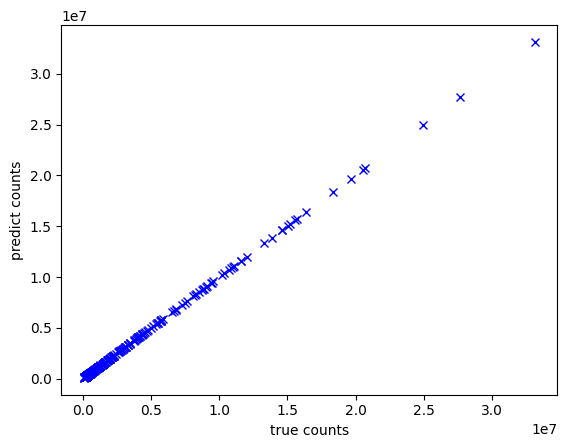

In [27]:
class PoissonRegression(LinearModel):

    def fit(self, X, y):

        m, n = X.shape
        self.theta = np.zeros(n)

        while True:
            theta_old = np.copy(self.theta)
            h = np.exp(X @ self.theta)
            self.theta += self.step_size * X.T @ (y - h) / m

            if np.linalg.norm(self.theta - theta_old, ord=1) < self.eps:
                break

    def predict(self, X):
        return np.exp(X @ self.theta)

def run(lr, train_path, eval_path, pred_path):
    # Load training set
    X_train, y_train = util.load_dataset(train_path, add_intercept=True)


    model = PoissonRegression(step_size=lr, eps=1e-5)
    model.fit(X_train, y_train)

    X_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(X_eval)
    np.savetxt(pred_path, y_pred)

    plt.figure()
    plt.plot(y_eval, y_pred, 'bx')
    plt.xlabel('true counts')
    plt.ylabel('predict counts')
    plt.savefig('Output/PoissonRegression.png')
if __name__ == "__main__":
    run(lr=1e-7,
       train_path="Data/train1.csv",
       eval_path="Data/test1.csv",
       pred_path="Output/PoissonRegression.png")

# **Gaussian regression**
    

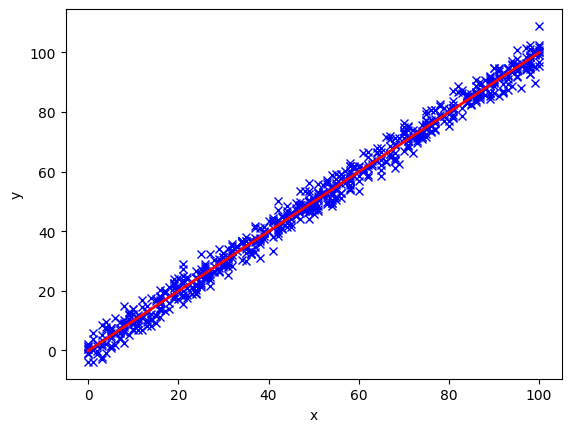

In [28]:
class GaussianRegression(LinearModel):

    def fit(self, X, y):

        m, n = X.shape
        self.theta = np.zeros(n)

        while True:
            theta_old = np.copy(self.theta)
            h = (X @ self.theta)
            self.theta += (1/m) * self.step_size * X.T @ (y - h)

            if np.linalg.norm(self.theta - theta_old, ord = 1) < self.eps:
                break

    def predict(self, X):
        return X @ self.theta

def run(train_path, eval_path, pred_path):
    X_train, y_train = util2.load_dataset(train_path, add_intercept = True)

    model = GaussianRegression(step_size = 0.0001)
    model.fit(X_train, y_train)

    util2.plot(X_train, y_train, model.theta, 'Output/GaussianRegression.png')
    
    X_eval, y_eval = util2.load_dataset(eval_path, add_intercept = True)
    

    y_pred = model.predict(X_eval)

    np.savetxt(pred_path, y_pred, fmt='%d')

if __name__ == "__main__":
    
    run(train_path="Data/train2.csv",
        eval_path="Data/test2.csv",
        pred_path="Output/GaussianRegression.txt")

# **Bernoulli regression**
    

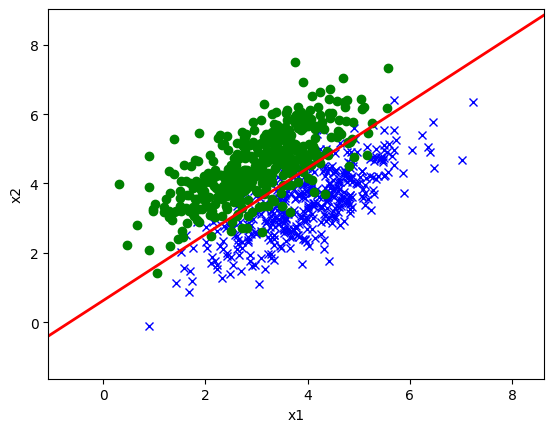

In [38]:
class BernoulliRegression(LinearModel):

    def fit(self, X, y):

        m, n = X.shape
        self.theta = np.zeros(n)

        while True:
            theta_old = np.copy(self.theta)

            h = 1 / (1 + np.exp(-(X @ self.theta)))

            gradient = X.T @ (y - h) / m
            self.theta += self.step_size * gradient


            if np.linalg.norm(self.theta - theta_old, ord = 1) < self.eps:
                break

    def predict(self, X):
        return 1 / (1 + np.exp(-(X @ self.theta)))


def run(train_path, eval_path, pred_path):
    X_train, y_train = util.load_dataset(train_path, add_intercept=True)

    model = BernoulliRegression(eps=1e-5)
    model.fit(X_train, y_train)

    # Plot data and decision boundary
    util.plot(X_train, y_train, model.theta, 'Output/BernoulliRegression.png')

    # Save predict
    X_eval, y_eval = util.load_dataset(eval_path, add_intercept=True)
    y_pred = model.predict(X_eval)
    np.savetxt(pred_path, y_pred > 0.5, fmt='%d')

if __name__ == "__main__":
    
    run(train_path="Data/train3.csv",
        eval_path="Data/test3.csv",
        pred_path="Output/BernoulliRegression.txt")